<a href="https://colab.research.google.com/github/divya374r1/Neural-Network-and-Deep-Learning/blob/main/Species_Identification_Using_Neural_Networks_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Enter image path: /content/elephant.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


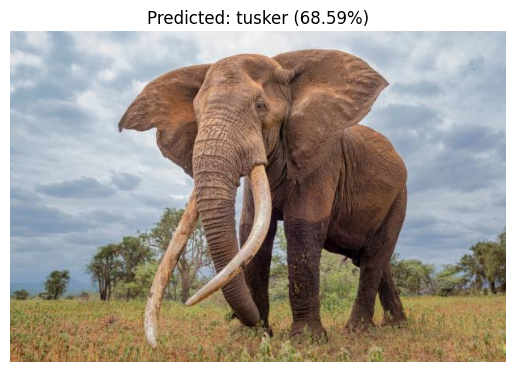

Identified Species: tusker (68.59%)


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Ask user for image path
img_path = input("Enter image path: ")

# Load image
img = cv2.imread(img_path)
if img is None:
    print("Image not found. Check the path!")
    exit()

# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize and preprocess
img_resized = cv2.resize(img_rgb, (224, 224))
img_array = np.expand_dims(img_resized, axis=0)
img_array = preprocess_input(img_array)

# Predict species
predictions = model.predict(img_array)
decoded = decode_predictions(predictions, top=1)[0]
species_name = decoded[0][1]
confidence = decoded[0][2]

# Display image with species name
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Predicted: {species_name} ({confidence*100:.2f}%)")
plt.show()

# Also print in console
print(f"Identified Species: {species_name} ({confidence*100:.2f}%)")
